In [28]:
SVG_data = read.table("./SVG_data", sep=",",header = TRUE)
source("SVG.r")
iSVG_tab <- get_iSVG(SVG_data, 11, target_np=30, alpha=39, tol.hor=20, last_max=FALSE, cressie=FALSE)

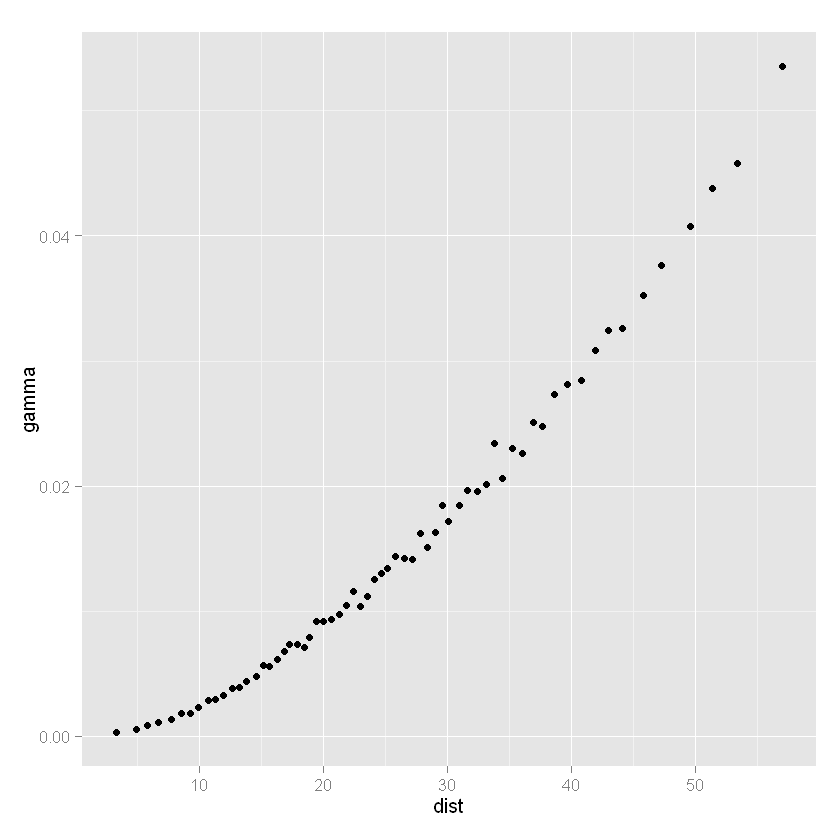

In [29]:
ggplot(iSVG_tab, aes(dist,gamma)) + geom_point(aes())+ theme(aspect.ratio=1)


In [1]:
require(gstat)

Loading required package: gstat


Warning message:
In as.POSIXlt.POSIXct(x, tz): unable to identify current timezone 'C':
please set environment variable 'TZ'Warning message:
In as.POSIXlt.POSIXct(x, tz): unknown timezone 'localtime'Warning message:
In krigeST(PM10 ~ 1, data = rr, newdata = DE_pred, modelList = sumMetricVgm): The spatio-temporal variogram model does not carry a time unit attribute: krisgeST cannot check whether the temporal distance metrics coincide.

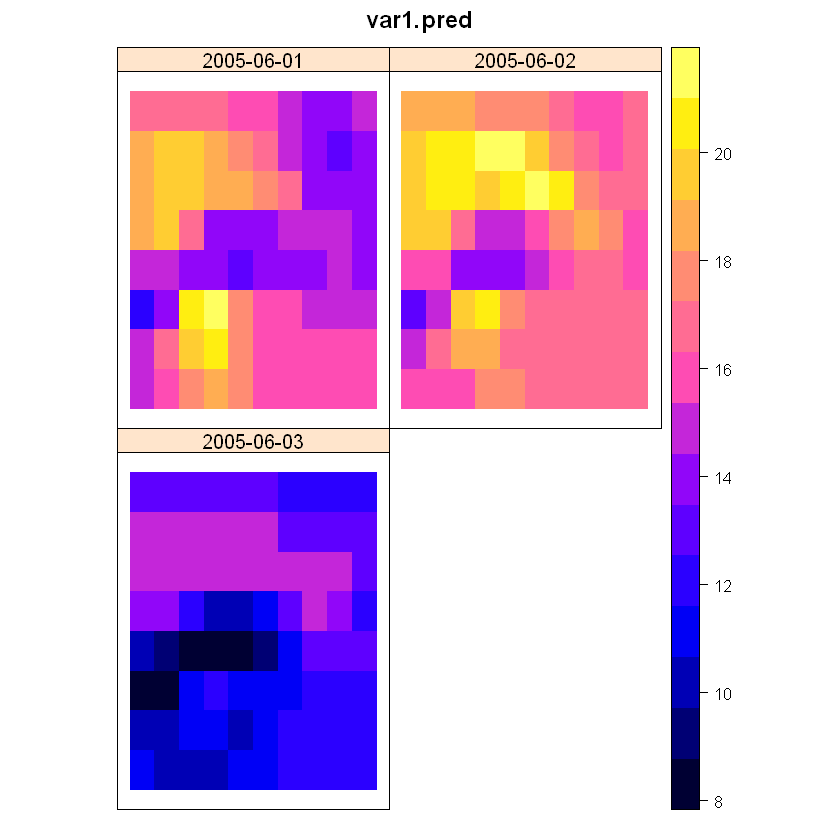

In [2]:
library(sp)
library(spacetime)
sumMetricVgm <- vgmST("sumMetric",
space=vgm( 4.4, "Lin", 196.6, 3),
time =vgm( 2.2, "Lin", 1.1, 2),
joint=vgm(34.6, "Exp", 136.6, 12),
stAni=51.7)
data(air)
if (!exists("rural"))
rural = STFDF(stations, dates, data.frame(PM10 = as.vector(air)))
rr <- rural[,"2005-06-01/2005-06-03"]
rr <- as(rr,"STSDF")
x1 <- seq(from=6,to=15,by=1)
x2 <- seq(from=48,to=55,by=1)
DE_gridded <- SpatialPoints(cbind(rep(x1,length(x2)), rep(x2,each=length(x1))),
proj4string=CRS(proj4string(rr@sp)))
gridded(DE_gridded) <- TRUE
DE_pred <- STF(sp=as(DE_gridded,"SpatialPoints"), time=rr@time)
DE_kriged <- krigeST(PM10~1, data=rr, newdata=DE_pred,
modelList=sumMetricVgm)
gridded(DE_kriged@sp) <- TRUE
stplot(DE_kriged)